# Trabajo Práctico final de integración

# Introducción al Problema

**Planteamiento del problema**

Bob ha comenzado su propia empresa de telefonía móvil. Quiere dar una pelea dura a las grandes empresas como Apple, Samsung, etc.
No sabe cómo estimar el precio de los móviles que fabrica su empresa. En este competitivo mercado de telefonía móvil no se puede simplemente asumir cosas. Para resolver este modelo, recopila datos de ventas de teléfonos móviles de varias empresas.
Bob quiere averiguar alguna relación entre las funciones de un teléfono móvil (p. ej., RAM, memoria interna, etc.) y su precio de venta. 

**Objetivo**

Entrenar el mejor algoritmo para determinar el rango de precios de los celulares, ya sea un modelo de clasificación o de regresion, el que mejor desempeño obtenga.

Referencia y Fuente de datos: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification



**Objetivos Generales:**
1. Entender el problema de negocio e identificar los elementos a ser considerados para el planteamiento de un Modelo de Data Science.
2. Describir los datos de negocio y las relaciones entre datos mediante el Análisis Exploratorio de Datos.
3. Elegir el algoritmo de entrenamiento y preparar los datos para el proceso de entrenamiento del modelo.
4. Evaluar los indicadores de desempeño predictivo del modelo y realizar optimizaciones.
5. Construir una presentación ejecutiva para la alta gerencia mostrando los resultados del modelo.

# Configuración y librerías

In [100]:
#Este codigo es para que los graficos se puedan ver.
%matplotlib inline 

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from matplotlib.ticker import FormatStrFormatter
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import silhouette_visualizer
from sklearn.tree import plot_tree


**Contenido de datos por cada columna del dataset**

*   battery_power = Energía total que una batería puede almacenar en un tiempo medida en mAh
*   blue = Tiene bluetooth o no
*   clock_speed = Velocidad a la que el microprocesador ejecuta las instrucciones
*   dual_sim = Tiene soporte dual sim o no
*   fc = Cámara frontal megapíxeles
*   four_g = Tiene 4G o no
*   int_memory = Memoria Interna en Gigabytes
*   m_dep = Fondo móvil en cm
*   mobile_wt = Peso del teléfono móvil
*   n_cores = Número de núcleos de procesador
*   pc = Megapíxeles de la cámara principal
*   px_height = Altura de resolución de píxeles
*   ram = Memoria de acceso aleatorio en megabytes
*   sc_h = Altura de la pantalla del móvil en cm
*   sc_w = Ancho de la pantalla del móvil en cm
*   talk_time = Tiempo que durará la bateria sin cargar
*   three_g = Tiene 3G o no
*   touch_screen = Tiene pantalla táctil o no
*   wifi = Tiene wifi o no
*   price_range = Esta es la variable objetivo con valor de 0 (costo bajo), 1 (costo medio), 2 (costo alto) y 3 (costo muy alto).

# Carga del dataset


In [102]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/15Wda6J1FBBBld-9B7BJG_Ms0lMx3QWJ96MBo0dq0vfg/export?format=csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Análisis rápido de la carga

In [103]:
# Primero realizamos un describe para leer mejor los datos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [104]:
# Vemos cuantos registros tiene el set de datos.
df.shape

(2000, 21)

In [105]:
#Con DataFrame.info() nos devuelve un detalle de la cantidad de variables, la cantidad de datos y el "dytpe" de cada columna.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

**Conclusion importante:** No tenemos nulos.


In [106]:
!pip install missingno
!wget https://docs.google.com/spreadsheets/d/15Wda6J1FBBBld-9B7BJG_Ms0lMx3QWJ96MBo0dq0vfg/export?format=csv'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/bin/bash: -c: line 0: unexpected EOF while looking for matching `''
/bin/bash: -c: line 1: syntax error: unexpected end of file


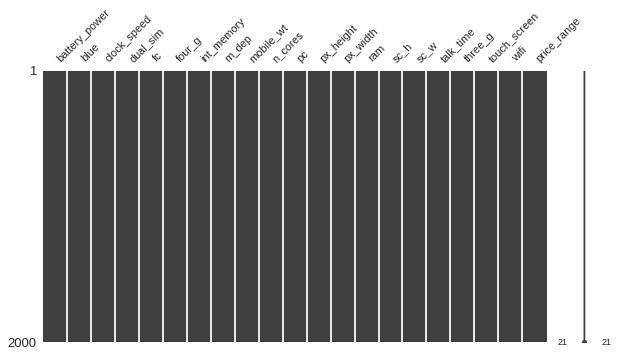

In [107]:
import missingno as msno

# Trazamos un gráfico de matriz, establenciendo tamaño.
msno.matrix(df, figsize=(10,5), fontsize=11)

## Identificamos las variables categoricas

In [108]:
#Analizando el dataset nos dimos cuenta que había variables categoricas, comprobamos si realmente lo son: 
for i in [1,3,5,17,18,19,20]:
  print(df.columns[i], df.iloc[:, i].unique())

blue [0 1]
dual_sim [0 1]
four_g [0 1]
three_g [0 1]
touch_screen [0 1]
wifi [1 0]
price_range [1 2 3 0]


**Columnas Categoricas:**


1.   blue 
2.   dual_sim
3.   four_g        
4.   three_g       
5.   touch_screen  
6.   wifi          
7.   price_range  

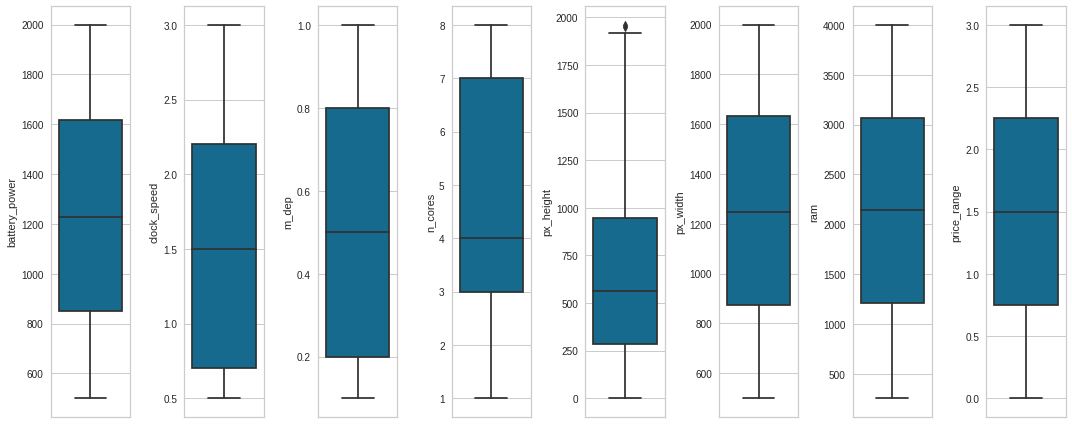

In [109]:
variables = ['battery_power', 'clock_speed',
             'm_dep', 'n_cores', 
             'px_height','px_width', 'ram', 'price_range']

fig, axes = plt.subplots(1, len(variables), figsize=(15,6))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=df, ax=ax)
plt.tight_layout()

**Análisis de Precio y Memoria Ram: Entre más memoria Ram el Precio es más alto**

# Análisis de Correlación

## Primera limpieza

**Eliminamos las variables categoricas identificadas anteriormente**

In [110]:
#limpieza de datos valores 1 a 0. Para el análisis de correlación no sirven

df1 = df.drop(columns = ["blue",
             "dual_sim", "four_g", 
             "three_g", "touch_screen", "wifi"])
df1



,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0


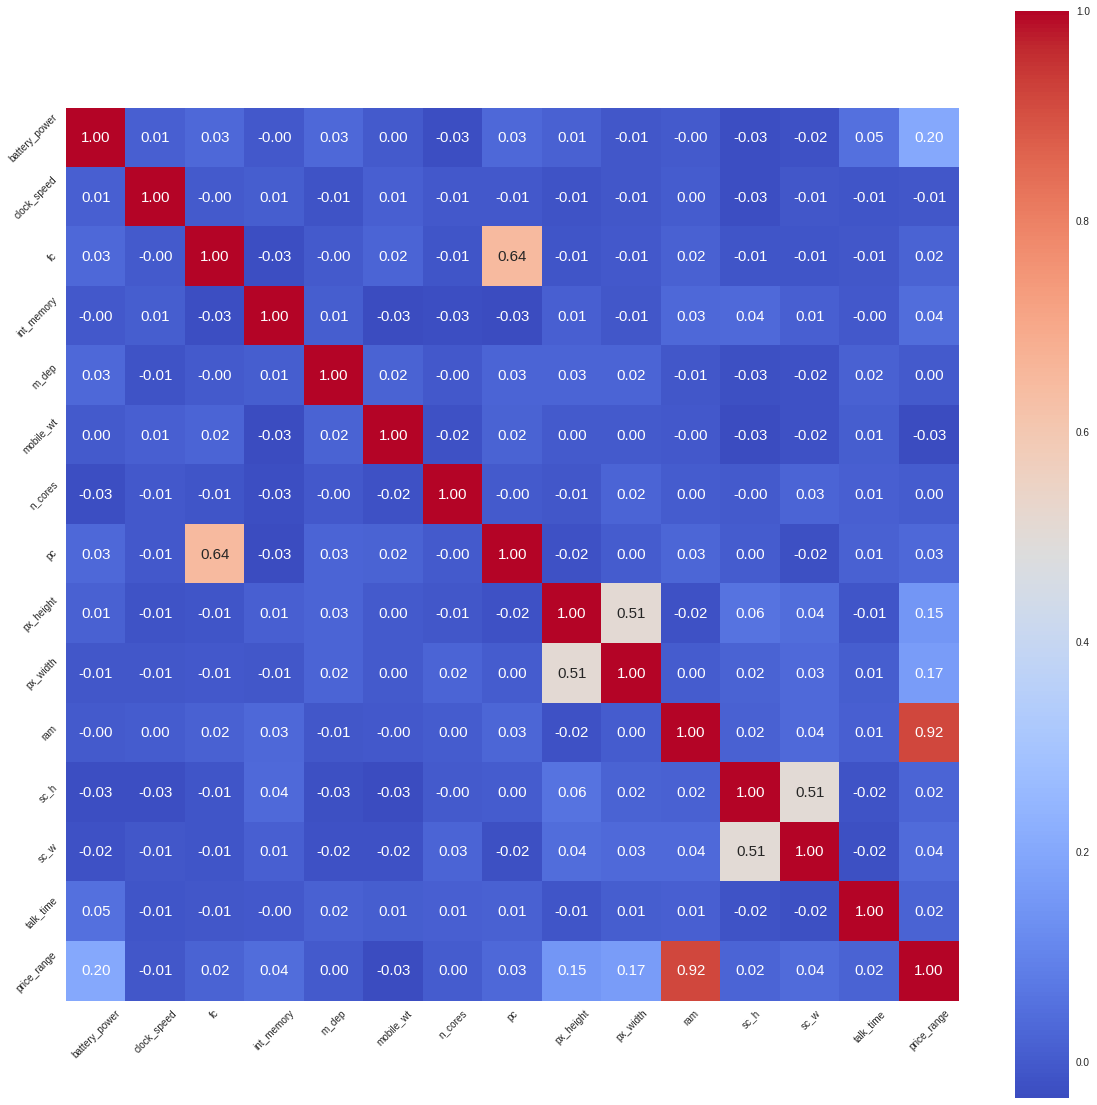

In [111]:
#Correlación con variable precio

plt.figure(figsize=(20,20)) #Defino el tamaño del grafico

#Roto los ejes para que queden inclinados
sns.heatmap(df1.corr() ,cbar = True, annot = True, annot_kws={'size': 15}, cmap= 'coolwarm', square = True, fmt= '.2f')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()


#Variables que no tiene correlación con price_range dockspeed, int_memory, m_dep, mobile_wt, pc, sc_h, sc_w, talk time, total camera, sc_siz

## Segunda limpieza

**Seguimos eliminando variables con poca indicencia de correlación para análisis más pronfundo**

In [112]:
#Segunda limpieza de datos valores sin correlación menor 0,1 

df2 = df1.drop(columns = ["clock_speed", "int_memory",
             "m_dep", "mobile_wt", 
             "n_cores", "pc", "fc", "sc_h", "sc_w", "talk_time"])
df2



,battery_power,px_height,px_width,ram,price_range
0,842,20,756,2549,1
1,1021,905,1988,2631,2
2,563,1263,1716,2603,2
3,615,1216,1786,2769,2
4,1821,1208,1212,1411,1
...,...,...,...,...,...
1995,794,1222,1890,668,0
1996,1965,915,1965,2032,2
1997,1911,868,1632,3057,3
1998,1512,336,670,869,0


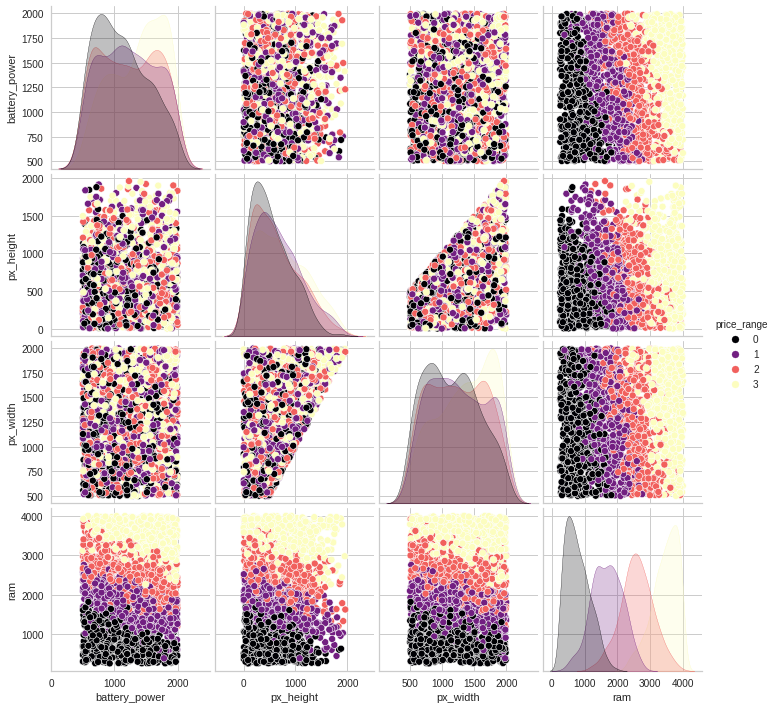

In [113]:
from seaborn.widgets import color_palette
sns.color_palette("magma", as_cmap=True)
sns.pairplot(df2, hue="price_range", palette="magma")


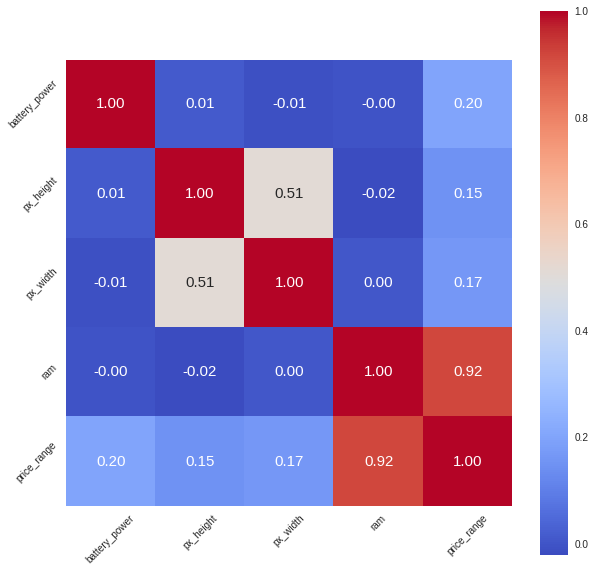

In [114]:
plt.figure(figsize=(10,10)) #Defino el tamaño del grafico

#Roto los ejes para que queden inclinados
sns.heatmap(df2.corr() ,cbar = True, annot = True, annot_kws={'size': 15}, cmap= 'coolwarm', square = True, fmt= '.2f')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

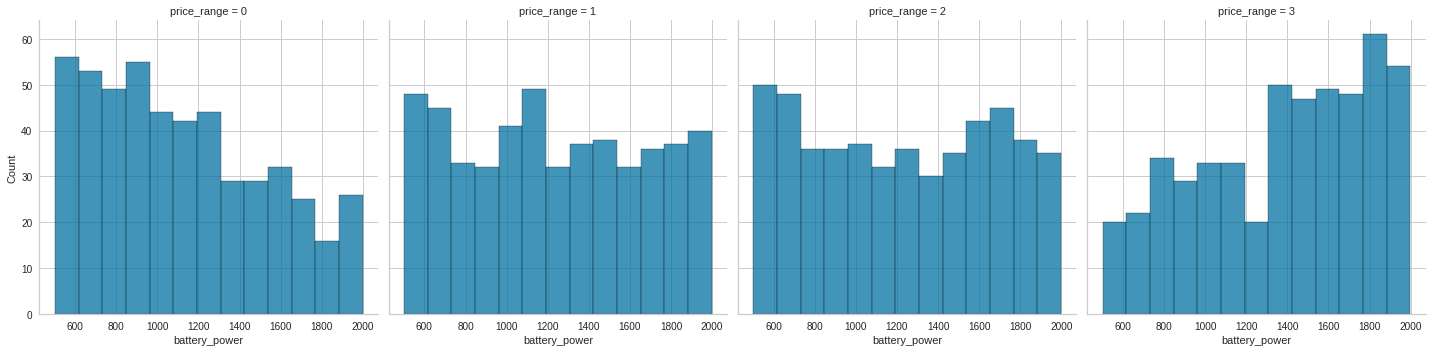

In [115]:
sns.displot(data=df, x='battery_power',col='price_range')

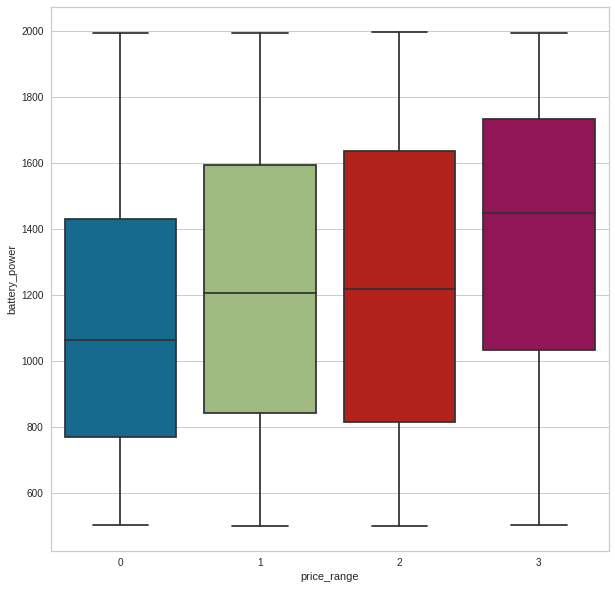

In [116]:
plt.figure(figsize=(10,10)) #defino el tamaño del grafico
sns.boxplot(y = 'battery_power', x = 'price_range', data = df)
plt.show()

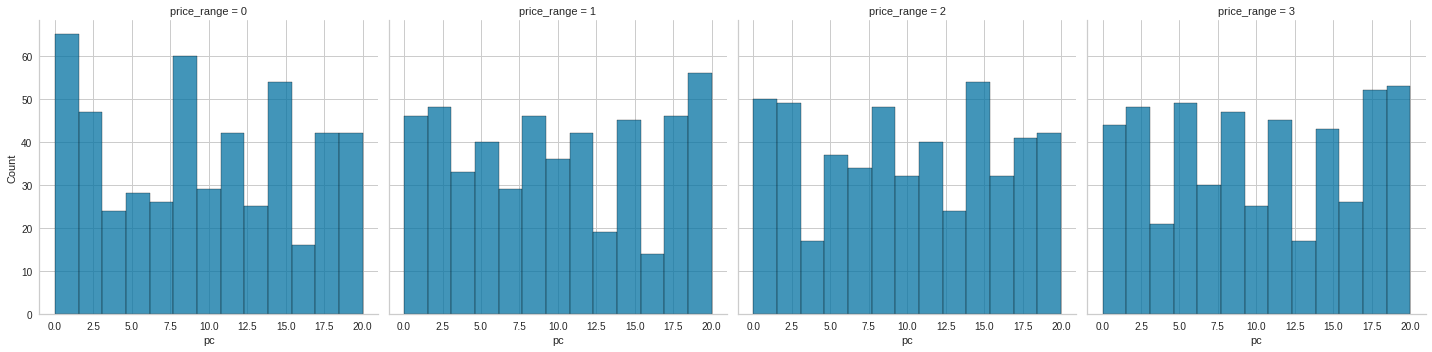

In [117]:
sns.displot(data=df, x='pc',col='price_range')

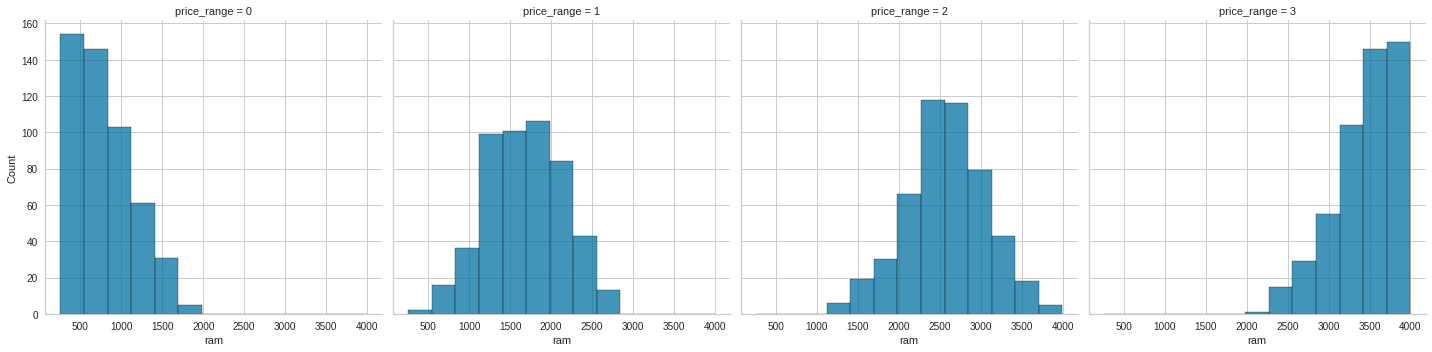

In [118]:
sns.displot(data=df, x='ram',col='price_range')

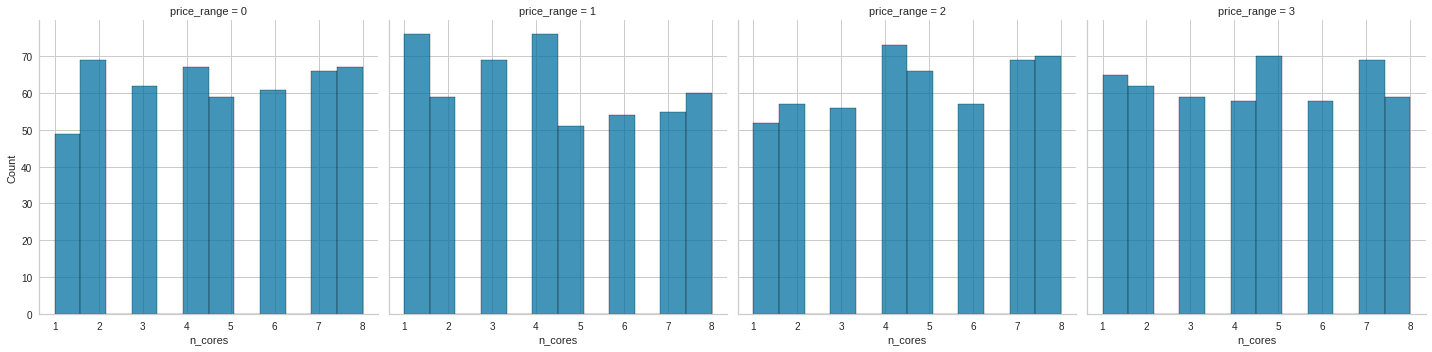

In [119]:
sns.displot(data=df, x='n_cores',col='price_range')

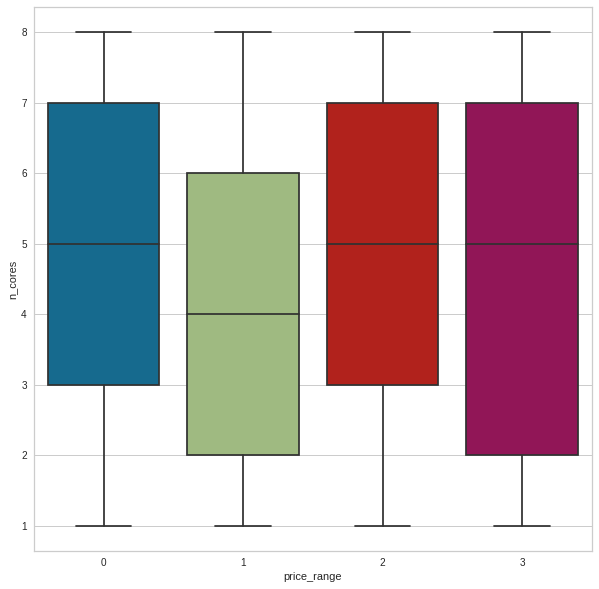

In [120]:
plt.figure(figsize=(10,10)) #defino el tamaño del grafico
sns.boxplot(y = 'n_cores', x = 'price_range', data = df)
plt.show()

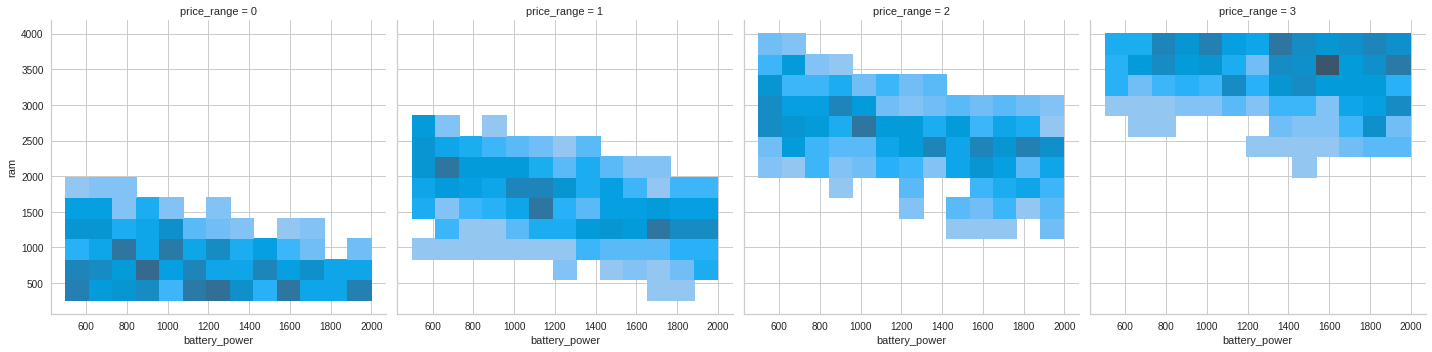

In [121]:
sns.displot(data=df,x='battery_power',y='ram',col='price_range')

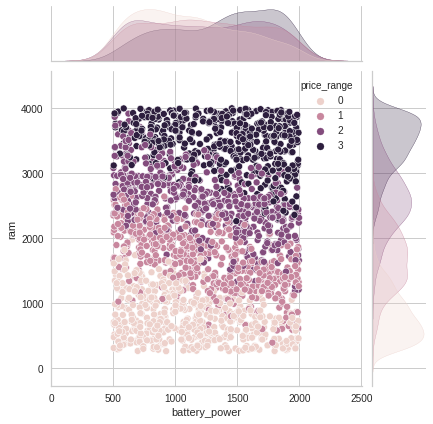

In [122]:
sns.jointplot(data=df,x='battery_power',y='ram',hue='price_range')

## Tercera limpieza

**Reincorporamos las variables [ 1 ; 0 ] y sacamos quien tengan menos 0,2 de correlación pc_width y px_height**

In [123]:
#Limpieza de datos de valores sin correlación
df3 = df.drop(columns = ["clock_speed", "int_memory",
             "m_dep", "mobile_wt", 
             "n_cores", "pc", "fc", "sc_h", "sc_w", "talk_time", "px_width","px_height" ])
df3


,battery_power,blue,dual_sim,four_g,ram,three_g,touch_screen,wifi,price_range
0,842,0,0,0,2549,0,0,1,1
1,1021,1,1,1,2631,1,1,0,2
2,563,1,1,1,2603,1,1,0,2
3,615,1,0,0,2769,1,0,0,2
4,1821,1,0,1,1411,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1995,794,1,1,1,668,1,1,0,0
1996,1965,1,1,0,2032,1,1,1,2
1997,1911,0,1,1,3057,1,1,0,3
1998,1512,0,0,1,869,1,1,1,0


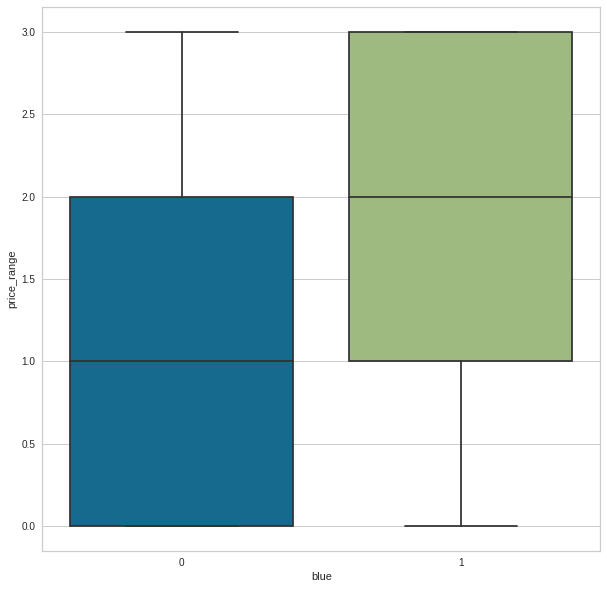

In [124]:
plt.figure(figsize=(10,10)) #defino el tamaño del grafico

sns.boxplot(y = 'price_range', x = 'blue', data = df3)
plt.show()

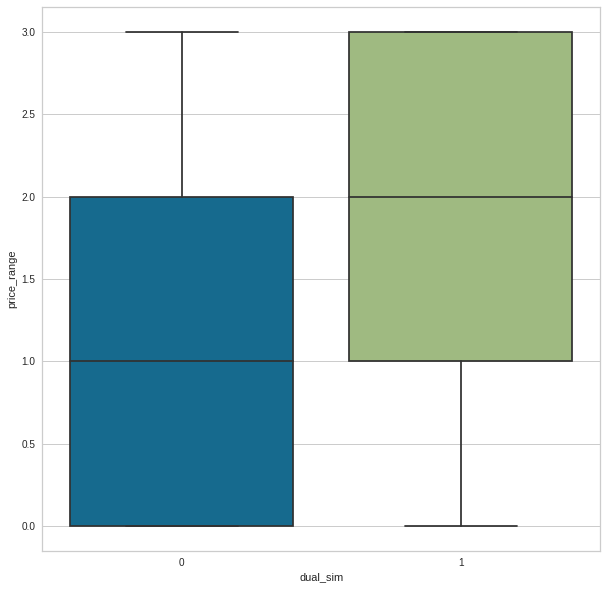

In [125]:
plt.figure(figsize=(10,10)) #defino el tamaño del grafico

sns.boxplot(y = 'price_range', x = 'dual_sim', data = df3)
plt.show()

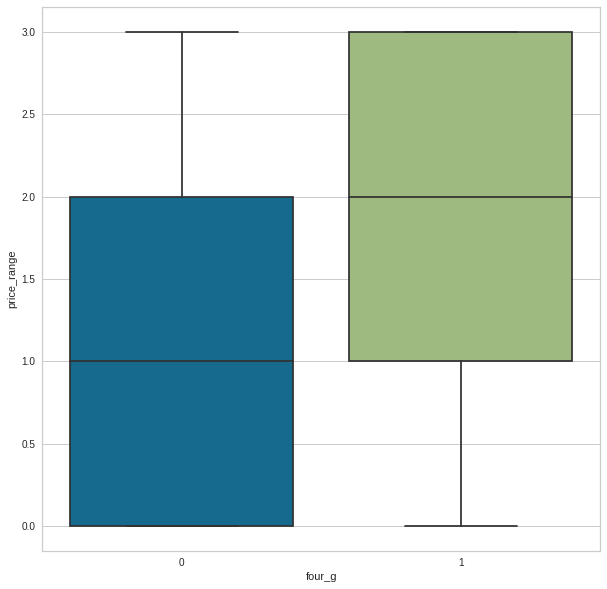

In [126]:
plt.figure(figsize=(10,10)) #defino el tamaño del grafico

sns.boxplot(y = 'price_range', x = 'four_g', data = df3)
plt.show()

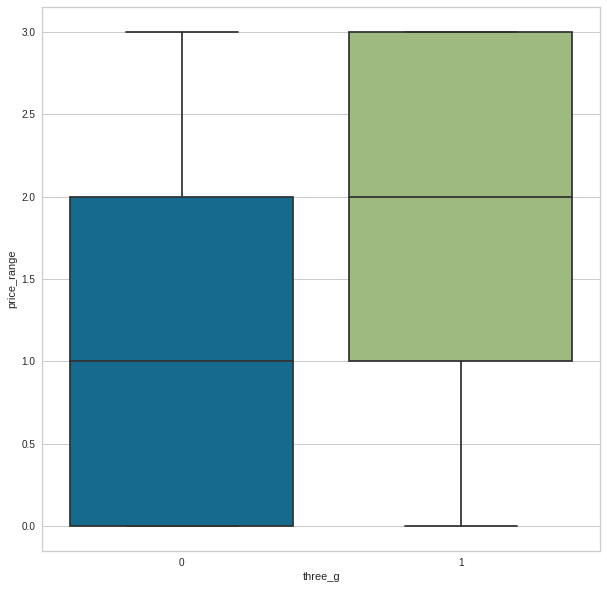

In [127]:
plt.figure(figsize=(10,10)) #defino el tamaño del grafico

sns.boxplot(y = 'price_range', x = 'three_g', data = df3)
plt.show()

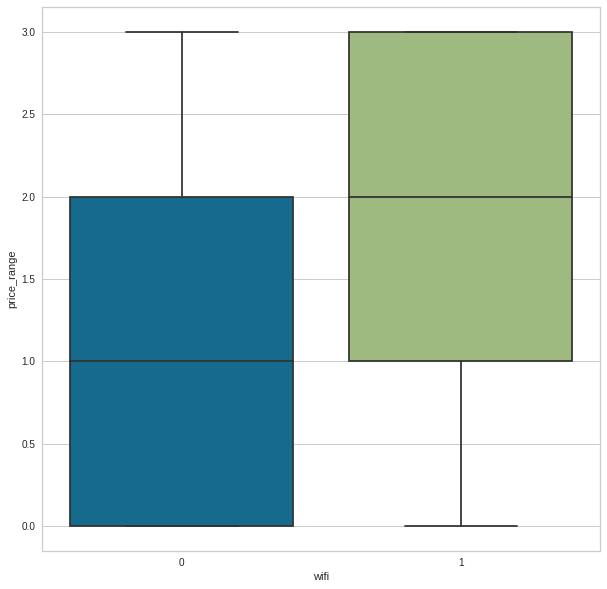

In [128]:
plt.figure(figsize=(10,10)) #defino el tamaño del grafico

sns.boxplot(y = 'price_range', x = 'wifi', data = df3)
plt.show()

## Cuarta limpieza

**Eliminamos variable continua y discretas**

In [129]:
df4 = df.drop(columns = ["clock_speed", "int_memory",
             "m_dep", "mobile_wt", 
             "n_cores", "pc", "fc", "sc_h", "sc_w", "talk_time", "px_width", "px_height"])
df4


,battery_power,blue,dual_sim,four_g,ram,three_g,touch_screen,wifi,price_range
0,842,0,0,0,2549,0,0,1,1
1,1021,1,1,1,2631,1,1,0,2
2,563,1,1,1,2603,1,1,0,2
3,615,1,0,0,2769,1,0,0,2
4,1821,1,0,1,1411,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1995,794,1,1,1,668,1,1,0,0
1996,1965,1,1,0,2032,1,1,1,2
1997,1911,0,1,1,3057,1,1,0,3
1998,1512,0,0,1,869,1,1,1,0


# Grafico de dispersión con la limpieza OK

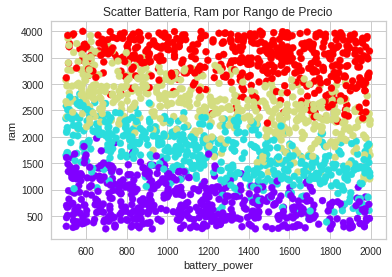

In [130]:
import numpy as np
plt.scatter(df4.battery_power,df4.ram, c = df.price_range, cmap = 'rainbow')         

plt.xlabel('battery_power')
plt.ylabel('ram')
plt.title('Scatter Battería, Ram por Rango de Precio')
plt.show()

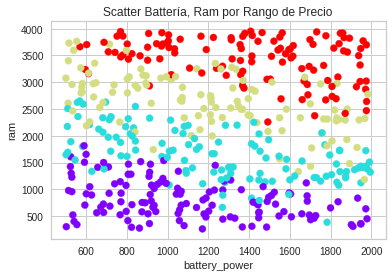

In [131]:
df5 = df4[df4.three_g == 0]

import numpy as np
plt.scatter(df5.battery_power,df5.ram, c = df5.price_range, cmap = 'rainbow')         

plt.xlabel('battery_power')
plt.ylabel('ram')
plt.title('Scatter Battería, Ram por Rango de Precio')
plt.show()


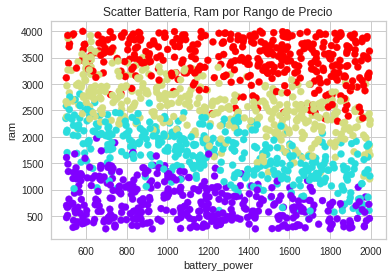

In [132]:
df5 = df4[df4.three_g == 1]

import numpy as np
plt.scatter(df5.battery_power,df5.ram, c = df5.price_range, cmap = 'rainbow')         

plt.xlabel('battery_power')
plt.ylabel('ram')
plt.title('Scatter Battería, Ram por Rango de Precio')
plt.show()

## Conclusión

##1- ¿Cuáles son las variables que generan mayor incidencia en la clasificación de precios?

R: En cuanto a las variables discretas y continuas que más inciden para la clasificación de precios es la variables RAM y ligeramente la variable de  Battery_Power, esto por que tiene mayor correlación, y están más afecto a si una de estas variables aumenta automáticamente la variable Precio es más alta, en el caso de la RAM esta correlación es muy alta de 0.92 no así para Battery Power de 0.2, las variables 1 y 0 no muestran incidencia significativa en la variable Price_Range

##2- ¿Qué variables no inciden en la predicción y son convenientes depurar?

R: Las variables que sacamos son las que tiene correlación menos 0.15 en el caso de las variables 1 y 0 las mantuvimos, aunque notamos previamente que tampoco son afectas al precio.


# Algoritmos de Clasificación

## Arbol de decisión

In [133]:
df4.head()

,battery_power,blue,dual_sim,four_g,ram,three_g,touch_screen,wifi,price_range
0,842,0,0,0,2549,0,0,1,1
1,1021,1,1,1,2631,1,1,0,2
2,563,1,1,1,2603,1,1,0,2
3,615,1,0,0,2769,1,0,0,2
4,1821,1,0,1,1411,1,1,0,1


In [134]:
df4.groupby('price_range').size()

price_range
0    500
1    500
2    500
3    500
dtype: int64

In [135]:
x = df4.drop("price_range", axis=1) #Elimino de mi dataset la variable a predecir
y = df4.price_range #Defino el Target

In [136]:
#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42) 

In [137]:
arbol_de_decision = DecisionTreeClassifier(max_depth=2, random_state = 42) 

In [138]:
arbol_de_decision.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [139]:
y_train_pred = arbol_de_decision.predict(X_train) #Prediccion en Train
y_test_pred = arbol_de_decision.predict(X_test) #Prediccion en Test

In [140]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.7678571428571429
% de aciertos sobre el set de evaluación: 0.75


## Random Forest


In [141]:
#Creamos un random forest!
model = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=200, random_state=11)

In [142]:
y_test_pred = model.predict(X_test) #Prediccion en Test

In [143]:
#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.785


## KNN

In [144]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [145]:
print('% de aciertos sobre el set de evaluación:',knn.score(X_test,y_test))

% de aciertos sobre el set de evaluación: 0.7933333333333333


**VALIDACION CRUZADA EN KNN**

In [146]:
# separar en X y y
data= df.values
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)

(2000, 20) (2000,)


In [147]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv=7, verbose=1, scoring='r2')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished


In [148]:
scores

array([0.95524432, 0.95244709, 0.94964838, 0.94964986, 0.95244709,
       0.92962685, 0.93281867])

In [149]:
print("%0.2f de r2 promedio con una desviacion estandar de %0.2f" % (scores.mean(), scores.std()))

0.95 de r2 promedio con una desviacion estandar de 0.01


# Algoritmos de Regresión

## Regresión lineal

In [150]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV

In [151]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [152]:
lm.fit(X_train,y_train)

LinearRegression()

In [153]:
print('% de aciertos sobre el set de evaluación:',lm.score(X_test,y_test))

% de aciertos sobre el set de evaluación: 0.8743029732140915


## Regresión Logistica

In [154]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [155]:
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [156]:
print('% de aciertos sobre el set de evaluación:',logmodel.score(X_test,y_test))

% de aciertos sobre el set de evaluación: 0.6833333333333333


**Conclusión:**  KNN y Regresión lineal se desempeñaron mejor

# Metricas de Clasificación



## Metrics Arbol de decisión

In [157]:
from sklearn.metrics import classification_report,confusion_matrix

In [158]:
ad = arbol_de_decision.predict(X_test)

In [159]:
print(classification_report(y_test, ad))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       151
           1       0.68      0.70      0.69       146
           2       0.66      0.60      0.63       148
           3       0.82      0.83      0.82       155

    accuracy                           0.75       600
   macro avg       0.75      0.75      0.75       600
weighted avg       0.75      0.75      0.75       600



In [160]:
matrix_ad=confusion_matrix(y_test,ad)
print(matrix_ad)

[[131  20   0   0]
 [ 25 102  19   0]
 [  2  28  89  29]
 [  0   0  27 128]]


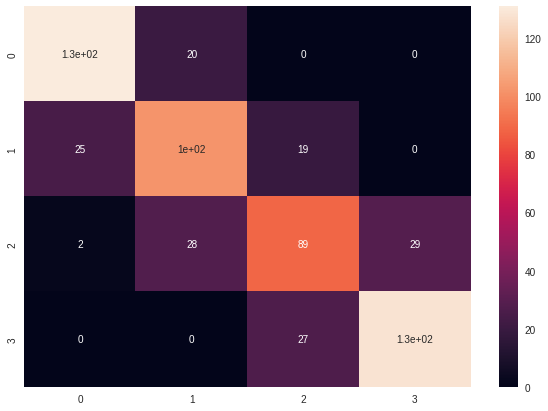

In [161]:
plt.figure(figsize = (10,7))
sns.heatmap(matrix_ad,annot=True)

## Metrics Random Forest

In [162]:
rf = model.predict(X_test)

In [163]:
print(classification_report(y_test,rf))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       151
           1       0.73      0.75      0.74       146
           2       0.65      0.70      0.68       148
           3       0.87      0.78      0.82       155

    accuracy                           0.79       600
   macro avg       0.79      0.78      0.79       600
weighted avg       0.79      0.79      0.79       600



In [164]:
matrix_rf=confusion_matrix(y_test,rf)
print(matrix_rf)

[[136  15   0   0]
 [ 14 110  22   0]
 [  0  26 104  18]
 [  0   0  34 121]]


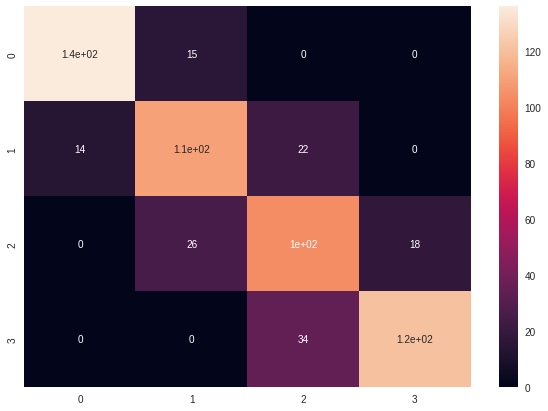

In [165]:
plt.figure(figsize = (10,7))
sns.heatmap(matrix_rf,annot=True)

## Metrics KNN

In [166]:
pred = knn.predict(X_test)

In [167]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       151
           1       0.74      0.77      0.76       146
           2       0.68      0.69      0.69       148
           3       0.88      0.78      0.83       155

    accuracy                           0.79       600
   macro avg       0.79      0.79      0.79       600
weighted avg       0.80      0.79      0.79       600



In [168]:
matrix=confusion_matrix(y_test,pred)
print(matrix)

[[140  11   0   0]
 [ 20 113  13   0]
 [  0  29 102  17]
 [  0   0  34 121]]


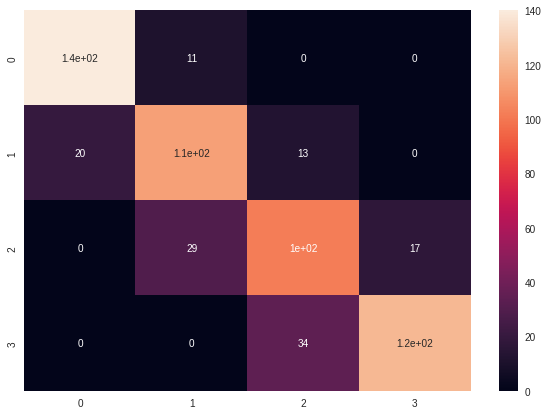

In [169]:
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)

In [170]:
print(matrix_ad) # ARBOL DE DECISION

[[131  20   0   0]
 [ 25 102  19   0]
 [  2  28  89  29]
 [  0   0  27 128]]


In [171]:
print(matrix_rf) # RANDOM FOREST

[[136  15   0   0]
 [ 14 110  22   0]
 [  0  26 104  18]
 [  0   0  34 121]]


In [172]:
print(matrix) # KNN

[[140  11   0   0]
 [ 20 113  13   0]
 [  0  29 102  17]
 [  0   0  34 121]]


**Según los falsos positivos y falsos negativos el KNN y random forest reflejan los mismos resultados.**

In [173]:
print(classification_report(y_test,rf)) # RANDOM FOREST

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       151
           1       0.73      0.75      0.74       146
           2       0.65      0.70      0.68       148
           3       0.87      0.78      0.82       155

    accuracy                           0.79       600
   macro avg       0.79      0.78      0.79       600
weighted avg       0.79      0.79      0.79       600



In [174]:
print(classification_report(y_test,pred)) # KNN

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       151
           1       0.74      0.77      0.76       146
           2       0.68      0.69      0.69       148
           3       0.88      0.78      0.83       155

    accuracy                           0.79       600
   macro avg       0.79      0.79      0.79       600
weighted avg       0.80      0.79      0.79       600



Analizando más metricas vemos que el accuracy es el mismo y que los demás parametros son similares.

Se tomó la decisión de avanzar con el algoritmo de KKN para la predicción de precios de Test.csv

##Conclusión

##3- ¿Qué atributos se pueden optimizar en el modelo de clasificación?

R: En gran parte de los modelos se consigue un valor de predictivo útil por ende con el fin de optimizar el modelo habría que utilizar modelos cómo el KNN o Random Forest que tiene un acuracy de 0.79 en vez un árbol normal que tiene 0.75 aún así todos los modelo de clasificación dan valores predictivo óptimos, esto gracias a la variables depuradas, y a la alta correlación que hay con la variable RAM Con el fin de predecir el modelo de precio utilizamos el KNN

# Metricas de Regresión


## Metrics Regresión Lineal

In [210]:
from sklearn.metrics import r2_score

In [211]:
y_pred = lm.predict(X_test)

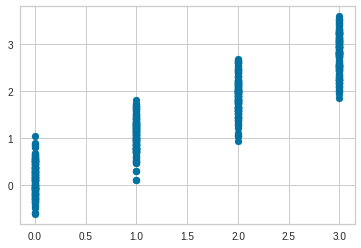

In [212]:
plt.scatter(y_test,y_pred)

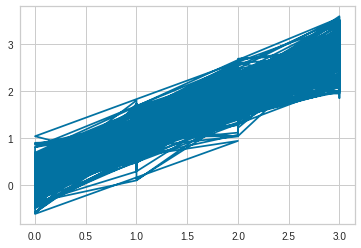

In [213]:
plt.plot(y_test,y_pred)

In [214]:
print('Puntaje Testing: ', r2_score(y_test, y_pred))

Puntaje Testing:  0.8743029732140915


In [215]:
#Evaluación de Modelos
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.3196253398823094
Mean Squared Error: 0.1596181152561247
Root Mean Squared Error: 0.39952235889387305


## Metrics Regresión Logistica

In [216]:
y_pred_logmodel = logmodel.predict(X_test)

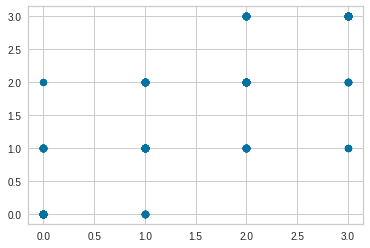

In [217]:
plt.scatter(y_test,y_pred_logmodel)

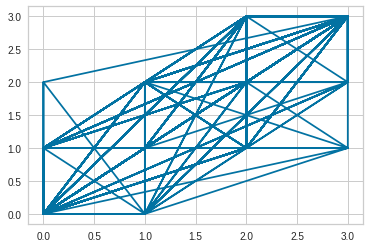

In [218]:
plt.plot(y_test,y_pred_logmodel)

In [219]:
print('Puntaje Testing: ', r2_score(y_test, y_pred_logmodel))

Puntaje Testing:  0.7270048627258827


In [220]:
#Evaluación de Modelos
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_logmodel))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_logmodel))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_logmodel)))

Mean Absolute Error: 0.32666666666666666
Mean Squared Error: 0.3466666666666667
Root Mean Squared Error: 0.5887840577551898


# Realizamos el test

In [186]:
data_test=pd.read_csv('https://docs.google.com/spreadsheets/d/1nYfynxPC5PIxKGSvRntj3W277zEXnN52IIJARKKwrnQ/export?format=csv')

In [187]:
data_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [188]:
data_test=data_test.drop('id',axis=1) 

In [189]:
#quitamos las columnas del test

data_test = data_test.drop(columns = ["clock_speed", "int_memory",
             "m_dep", "mobile_wt", 
             "n_cores", "pc", "fc", "sc_h", "sc_w", "talk_time", "px_width", "px_height"])


In [190]:
data_test.head()

,battery_power,blue,dual_sim,four_g,ram,three_g,touch_screen,wifi
0,1043,1,1,0,3476,0,1,0
1,841,1,1,1,3895,1,0,0
2,1807,1,0,0,2396,0,1,1
3,1546,0,1,1,3893,1,1,0
4,1434,0,0,1,1773,1,0,1


In [191]:
df4.shape

(2000, 9)

In [192]:
data_test.shape

(1000, 8)

In [193]:
df4.columns

Index(['battery_power', 'blue', 'dual_sim', 'four_g', 'ram', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [194]:
data_test.columns

Index(['battery_power', 'blue', 'dual_sim', 'four_g', 'ram', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

**Modelo**

In [195]:
prediccion = knn.predict(data_test)

**Predición del rango de precio**

In [196]:
prediccion

array([3, 3, 2, 3, 1, 3, 3, 0, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 0, 2,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 2, 3, 1, 1, 2, 0, 0,
       0, 1, 1, 2, 1, 2, 1, 0, 2, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 2, 1, 1,
       1, 2, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 1, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 3, 0, 2, 2, 0, 2, 1, 3, 1, 0, 0, 2, 1, 2, 0, 1, 2, 3,
       3, 2, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 1, 0, 3, 3, 2, 1, 0, 1,
       1, 1, 3, 0, 2, 0, 3, 2, 1, 3, 1, 2, 3, 3, 3, 3, 1, 3, 2, 3, 0, 0,
       2, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 1, 0, 3, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 3, 1, 1, 2, 2,
       2, 3, 1, 2, 3, 2, 3, 1, 1, 1, 1, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 0, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 2, 3, 1, 2, 3, 0, 0, 3, 2, 3, 1, 3, 1, 0, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 2, 1, 1, 3, 2, 0, 3, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 2, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1,

**Agregar el precio previsto al test**

In [197]:
data_test['price_range']=prediccion

In [198]:
data_test

,battery_power,blue,dual_sim,four_g,ram,three_g,touch_screen,wifi,price_range
0,1043,1,1,0,3476,0,1,0,3
1,841,1,1,1,3895,1,0,0,3
2,1807,1,0,0,2396,0,1,1,2
3,1546,0,1,1,3893,1,1,0,3
4,1434,0,0,1,1773,1,0,1,1
...,...,...,...,...,...,...,...,...,...
995,1700,1,0,1,2121,1,1,0,2
996,609,0,1,0,1933,0,1,1,1
997,1185,0,0,1,1223,1,0,0,1
998,1533,1,1,0,2509,0,1,0,2
